# 1-D CNN model for CAP classification 
- Authors - Shruti Murarka, Aditya Wadichar

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

## Healthy Dataset

In [4]:
# preparing dataset
# bal_all = np.loadtxt('/content/drive/MyDrive/FYP/A1_A2_A3_B_data/Data_csv/bal_healthy.csv', delimiter=',')
bal_all = np.loadtxt('DATA_A1_A2_A3_B/Data_combine/bal_healthy.csv', delimiter=',')
x_bal = bal_all[:,0:1024]
y_bal = bal_all[:,1024]
y_bal=y_bal.reshape(-1,1 )

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_bal)
onehotlabels = enc.transform(y_bal).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_bal, onelabel, test_size = 0.2, shuffle = True)

n_epochs=100

In [5]:
print(np.unique(y_bal))
print(np.unique(onelabel))

[0. 1. 2. 3.]
[0 1]


### Hyperparameter Optimization

In [6]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from keras.layers import Dense
from keras.layers import LSTM
# from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Conv1D

param = 16
kfold = KFold(n_splits=5, shuffle=True, random_state=1) 
fold_no = 1
acc_per_fold1 = []
loss_per_fold1 = []
for train, test in kfold.split(x_train1,  y_train1):
    model = Sequential()
    model.add(tfl.Conv1D(filters=32,
                    kernel_size=7,
                    strides=1,
                    padding='same',
            input_shape=(1024,1)))
   
    model.add(tfl.Conv1D(filters=8,
                    kernel_size=3,
                    strides=1,
                    padding='same', activation='relu'))
    model.add(tfl.MaxPool1D(pool_size= 16,
                       padding='same'))
    model.add(tfl.Conv1D(filters=16,
                    kernel_size=2,
                    strides=1,
                    padding='same'))
    model.add(tfl.Dropout(0.4))
    model.add(tfl.Conv1D(filters=8,
                    kernel_size=2,
                    strides=1,
                    padding='same',activation='relu'))
    model.add(tfl.MaxPool1D(pool_size= 4,
                       padding='same'))
    model.add(tfl.Flatten())
    model.add(tfl.Dense(param, activation='relu'))    ## parameter change
    model.add(tfl.Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'adam',
                  loss='binary_crossentropy',
              metrics=['accuracy'])
    

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    
    # Fit data to model
    history1 = model.fit(x_train1[train], y_train1[train],
                batch_size=75,
                epochs=n_epochs)

    # Generate generalization metrics
    scores1 = model.evaluate(x_train1[test], y_train1[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores1[0]}; {model.metrics_names[1]} of {scores1[1]*100}%')
    acc_per_fold1.append(scores1[1] * 100)
    loss_per_fold1.append(scores1[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
80/80 [==============================] - 2s 23ms/step - loss: 0.7264 - accuracy: 0.5390
Epoch 2/100
80/80 [==============================] - 2s 19ms/step - loss: 0.6012 - accuracy: 0.6801
Epoch 3/100
80/80 [==============================] - 2s 19ms/step - loss: 0.5208 - accuracy: 0.7495
Epoch 4/100
80/80 [==============================] - 2s 19ms/step - loss: 0.4990 - accuracy: 0.7624
Epoch 5/100
80/80 [==============================] - 2s 19ms/step - loss: 0.4837 - accuracy: 0.7701
Epoch 6/100
80/80 [==============================] - 2s 20ms/step - loss: 0.4780 - accuracy: 0.7711
Epoch 7/100
80/80 [==============================] - 2s 19ms/step - loss: 0.4755 - accuracy: 0.7778
Epoch 8/100
80/80 [==============================] - 2s 20ms/step - loss: 0.4688 - accuracy: 0.7817
Epoch 9/100
80/80 [==============================] - 2s 20ms/step - loss: 0.4575 - accuracy: 0.7889
Epo

In [7]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold1)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold1[i]} - Accuracy: {acc_per_fold1[i]}%')  
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold1)} (+- {np.std(acc_per_fold1)})')
print(f'> Loss: {np.mean(loss_per_fold1)}')
print('------------------------------------------------------------------------')

#np.savetxt('/content/drive/MyDrive/FYP/Hyper_opti/dense_param4.csv', acc_per_fold1, delimiter=',')
# np.savetxt('Hyper_opti/dense_param4.csv', acc_per_fold1, delimiter=',')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.42482805252075195 - Accuracy: 80.79248070716858%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.4737290143966675 - Accuracy: 79.78509068489075%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.43762513995170593 - Accuracy: 80.12088537216187%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.4407110810279846 - Accuracy: 79.58361506462097%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.4617880582809448 - Accuracy: 79.0994644165039%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 79.87630724906921 (+- 0.5650957841900738)
> Loss: 0.44773626923561094
--------------------------

In [8]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 1024, 32)          256       
                                                                 
 conv1d_17 (Conv1D)          (None, 1024, 8)           776       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 64, 8)             0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 64, 16)            272       
                                                                 
 dropout_4 (Dropout)         (None, 64, 16)            0         
                                                                 
 conv1d_19 (Conv1D)          (None, 64, 8)             264       
                                                      

In [10]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical

num_classes=2
y_train1_encoded = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded = to_categorical(y_test1, num_classes=num_classes)


# Define the model with LSTM and fully connected layers
model = Sequential()
model.add(LSTM(units=32, input_shape=(1024, 1)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))  # num_classes is the number of output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

# Train the model
# history = model.fit(x_train1[train], y_train1[train], epochs=n_epochs, batch_size=75, validation_split=0.2)
history = model.fit(x_train1, y_train1_encoded, epochs=n_epochs, batch_size=75, validation_split=0.2)
# history = model.fit(x_train1[train], y_train1_encoded[train], epochs=n_epochs, batch_size=75, validation_split=0.2)


Epoch 1/100
80/80 [==============================] - 16s 189ms/step - loss: 0.6958 - accuracy: 0.5063 - val_loss: 0.6911 - val_accuracy: 0.5212
Epoch 2/100
80/80 [==============================] - 14s 172ms/step - loss: 0.6832 - accuracy: 0.5562 - val_loss: 0.6838 - val_accuracy: 0.5460
Epoch 3/100
80/80 [==============================] - 14s 178ms/step - loss: 0.6724 - accuracy: 0.5773 - val_loss: 0.6788 - val_accuracy: 0.5635
Epoch 4/100
80/80 [==============================] - 14s 175ms/step - loss: 0.6657 - accuracy: 0.5978 - val_loss: 0.6578 - val_accuracy: 0.6091
Epoch 5/100
80/80 [==============================] - 14s 176ms/step - loss: 0.6584 - accuracy: 0.6126 - val_loss: 0.6798 - val_accuracy: 0.5534
Epoch 6/100
80/80 [==============================] - 14s 176ms/step - loss: 0.6610 - accuracy: 0.5988 - val_loss: 0.6689 - val_accuracy: 0.5836
Epoch 7/100
80/80 [==============================] - 14s 176ms/step - loss: 0.6584 - accuracy: 0.6035 - val_loss: 0.6649 - val_accuracy:

In [11]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 4914 (19.20 KB)
Trainable params: 4914 (19.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test1, y_test1_encoded,verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Test Loss: 0.5949883460998535, Test Accuracy: 0.6680988073348999


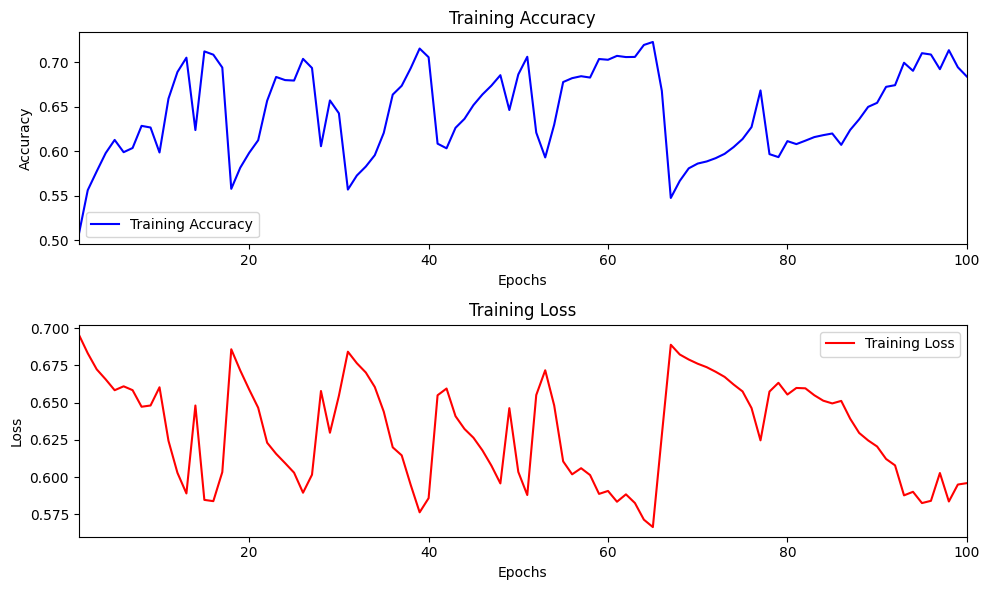

In [13]:
# Extract metrics history from training
loss = history.history['loss']
accuracy = history.history['accuracy']

# Plotting the metrics
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim((1,n_epochs))
# plt.ylim((0,1))
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim((1,n_epochs))
# plt.ylim((0,1))
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
model.save('modelo2_lstm')

INFO:tensorflow:Assets written to: modelo2_lstm\assets


INFO:tensorflow:Assets written to: modelo2_lstm\assets
